# Execute the code below

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link)
df_weather['DATE'] = pd.to_datetime(df_weather['DATE'])

# You have now a DataFrame with lots of weather data

In [3]:
df_weather.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,...,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY
0,2019-01-01,9,4,10,4,7,8,0.2,94,9.0,...,3,116,143,176,0,1,5.1,very bad,1,1
1,2019-01-02,8,5,18,7,7,5,0.0,90,9.0,...,3,119,116,116,0,1,8.7,very bad,1,2
2,2019-01-03,6,0,18,0,4,3,0.0,88,10.0,...,-4,116,116,116,0,1,8.7,very bad,1,3
3,2019-01-04,5,-1,15,-1,4,3,0.0,91,10.0,...,-4,116,116,122,0,1,5.1,very bad,1,4
4,2019-01-05,6,-1,8,-1,4,3,0.0,91,8.0,...,-2,143,116,116,0,1,8.7,very bad,1,5


# Now, complete the following tasks :

## First of all, you have to create a scatterplot with max (in red) and min (in blue) temperatures located on the same graph

There are lots of colors to chose from here : https://python-graph-gallery.com/100-calling-a-color-with-seaborn/

Create a scatterplot :
- with max (in red) and min (in blue) temperatures on the same graph
- Y-axis for temperatures
- X-axis for dates
- Include legend, readable axis ticks, and title

Here is an example of what is expected :

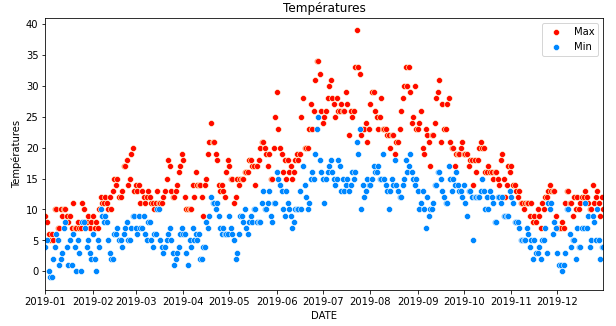


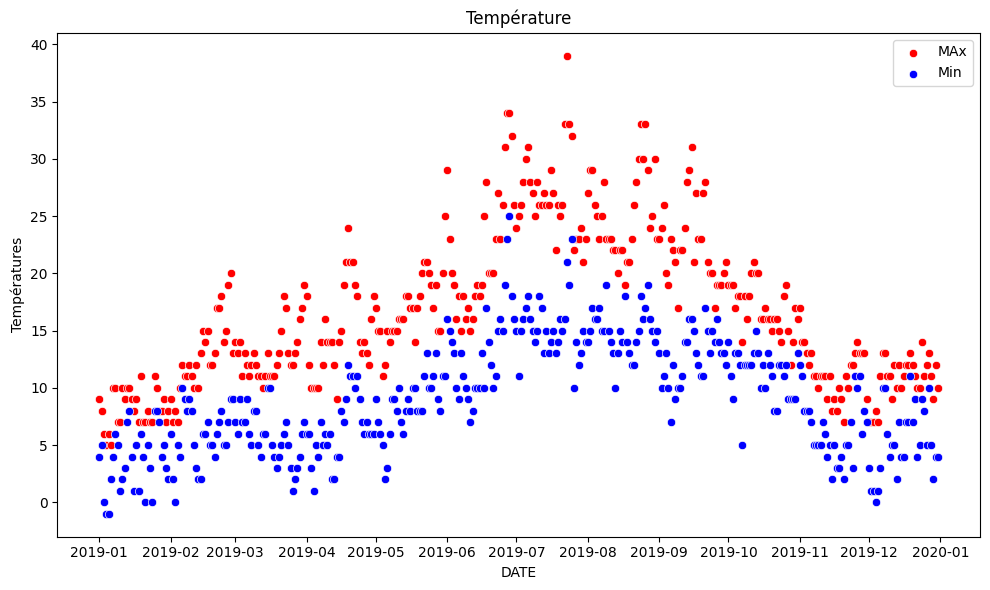

In [10]:
# Of course, you'll add legend, readable axis ticks, and title (there is no seaborn function for that, use matplotlib syntax)
# It's up to you:

#Importation pour le format date:
import matplotlib.dates as mdates

#Création du graph
plt.figure(figsize=(10,6))
sns.scatterplot(x='DATE', y='MAX_TEMPERATURE_C', data=df_weather, color='red', label='Max Temperature')
sns.scatterplot(x='DATE', y='MIN_TEMPERATURE_C', data=df_weather, color='blue', label='Min Temperature')

#Titre et labels
plt.title('Température')
plt.xlabel('DATE')
plt.ylabel('Températures')

plt.legend(labels=['MAx', 'Min'])

#De base sur le graph les dates sont par tranches de deux mois sur l'exemple c'est mois par mois donc on change ça.
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

#Lisibilité

plt.tight_layout()

plt.show()


## Colorize with hue argument, to show the criterias of the opinion columns

With Seaborn, you can use the "data" argument to indicate your DataFrame, syntax will be prettier.

Here is an example of what is expected :

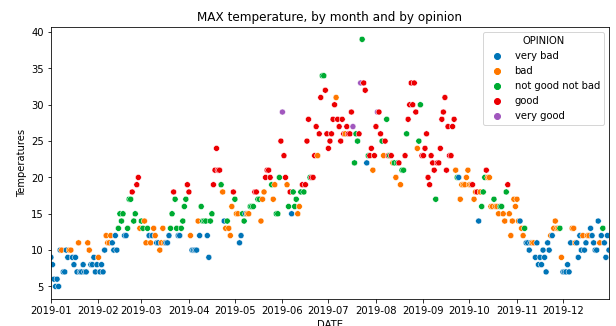

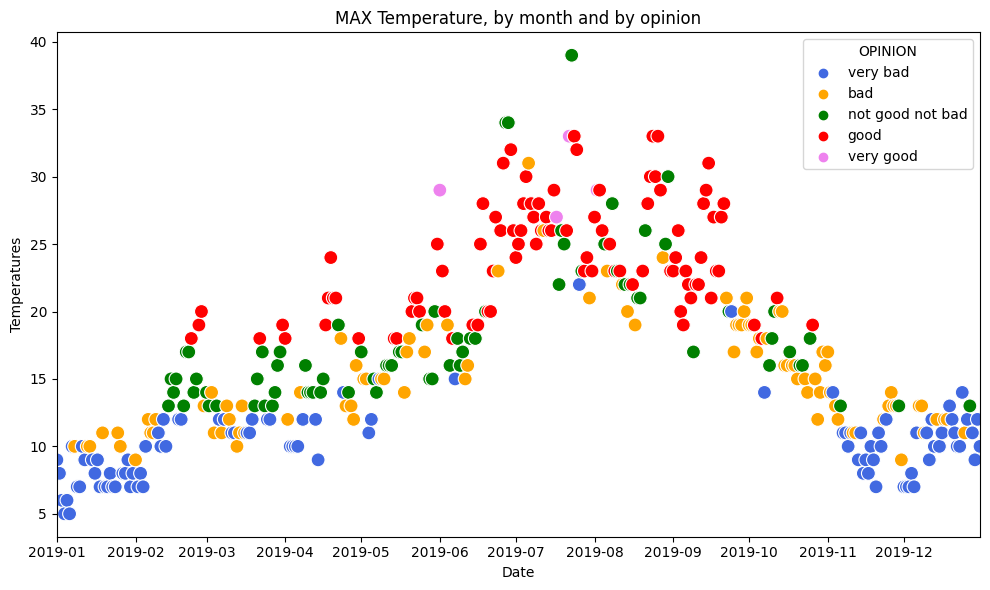

In [22]:
# Of course, you'll add legend, readable axis ticks, and title (there is no seaborn function for that, use matplotlib syntax)
# It's up to you:
#on monte le graphique avec les temps min max, and hue pour calcer opinion et importation de palette de couleurs
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DATE', y='MAX_TEMPERATURE_C', data=df_weather, hue='OPINION',
                palette=['royalblue','orange','green','red','violet'], s=100)

#Titre et labels
plt.title('MAX Temperature, by month and by opinion')
plt.xlabel('Date')
plt.ylabel('Temperatures')

#formattage des dates mois par mois
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

#My bad je n'avais pas vu dans l'exo d'avant que la date se finissait à 2019-12 donc je le fais ici
plt.xlim(df_weather['DATE'].min(), pd.Timestamp('2019-12-31'))
#LIsibilité
plt.xticks(ha='center')
plt.tight_layout()

plt.show()


## Correlation coefficient and heatmap - change the palette and interpretation

For more information : https://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/





What does it mean ? Could you interpret this ? Why the diagonal value is `1` ? And why there is a blank column and a blank row ?

Could you find the less correlated columns ? Be careful : the less correlated columns are those with a correlated coefficient close to 0, not -1.

Let's modify it to be more readable.
Please change the palette (`cmap`) to a more beautiful one. Chose a "diverging" palette in this page https://seaborn.pydata.org/tutorial/color_palettes.html and `center` it on 0.



Here is an example of what is expected (but you can improve colors) :

![ ](https://storage.googleapis.com/quest_editor_uploads/Ci9AZJdBsnuTx7z8XuZRTbvoCi3uON5r.png)

Then, please add a title of course.

Try to interpret it : which columns are most correlated with MAX Temperature ? Positively and negatively ? Do you think it's logical ?

<ipython-input-28-2c2c02dbb7d8>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_weather.corr()


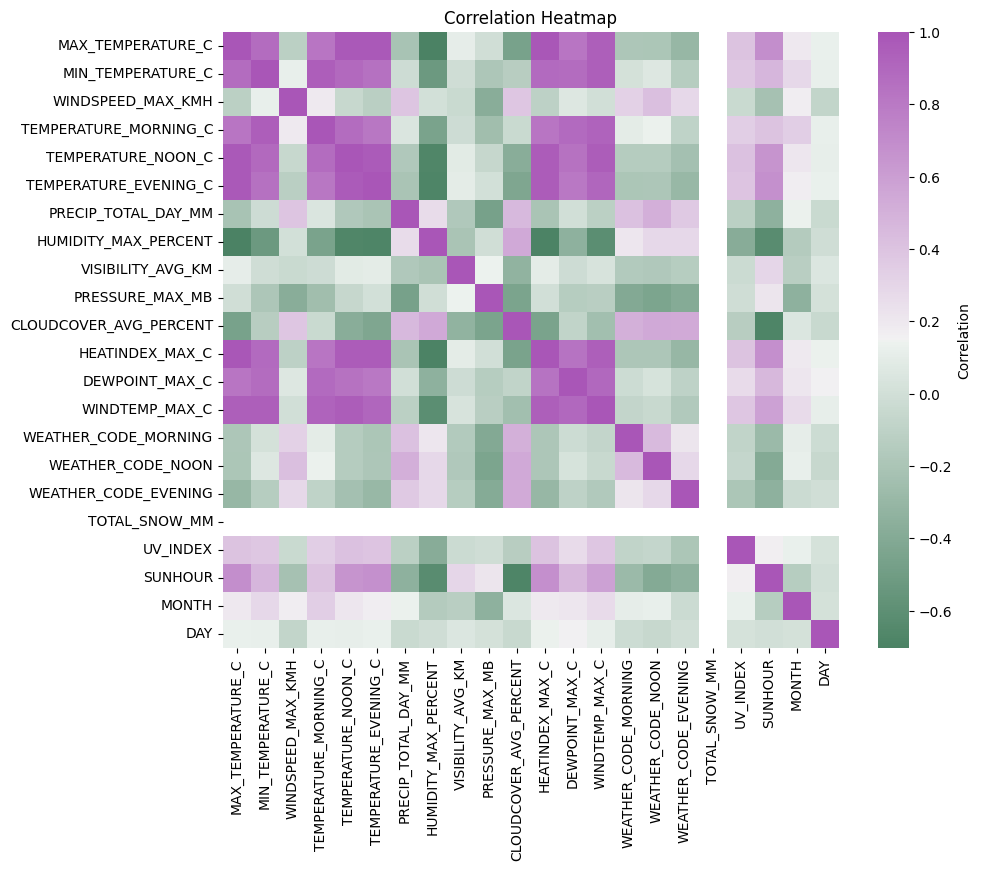

In [28]:
# It's your turn now :
# Calcule de la matrix pour corrélation
correlation_matrix = df_weather.corr()

# mise en place de matplotlib graph
plt.figure(figsize=(10, 8))

# utilisation de cmap pour la graduation de palette  je n'ai pas trouvé le code pour la couleur de l'exercice mais j'ai utilisé comme demandé un diverging
cmap = sns.diverging_palette(145, 300, s=60, as_cmap=True)

# Creation de la heatmap avec la corrélation
sns.heatmap(correlation_matrix, cmap=cmap, annot=False, cbar_kws={'label': 'Correlation'}, square=True)

# un pti titre pour la forme
plt.title('Correlation Heatmap')

plt.show()



<ipython-input-31-e6e80bbd33d6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_weather.corr()


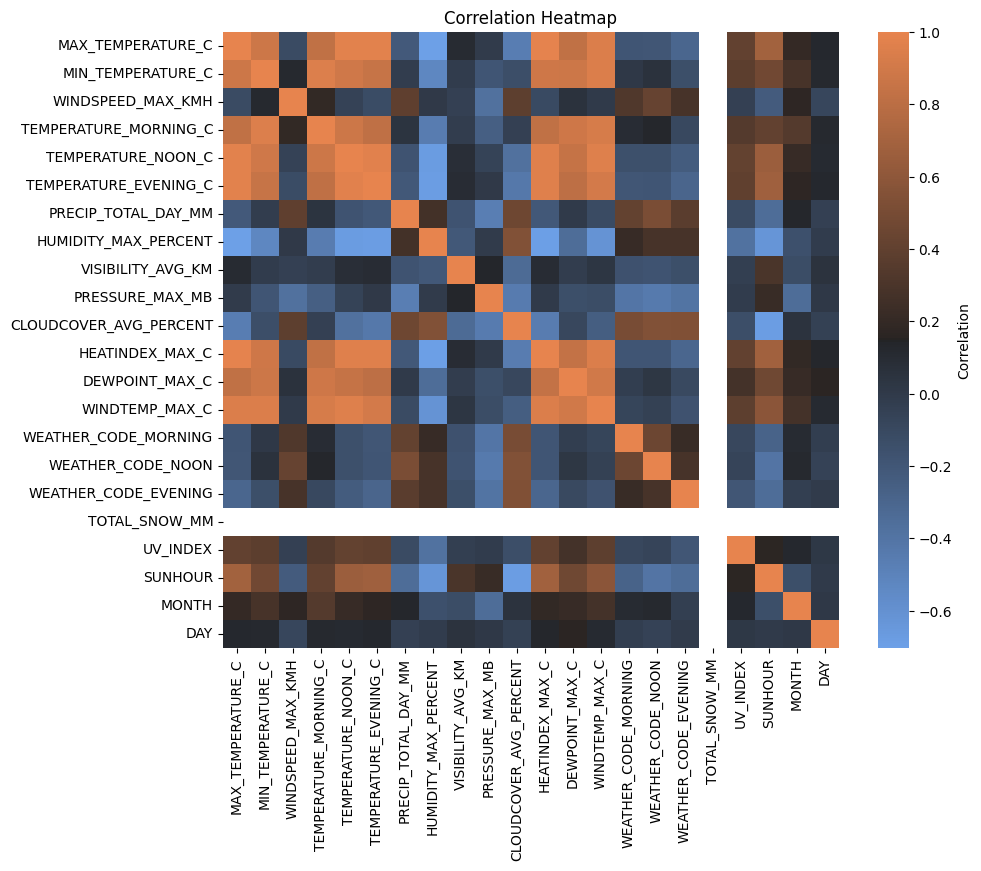

In [31]:
correlation_matrix = df_weather.corr()


plt.figure(figsize=(10, 8))

# Utilisation de center pour mieux voir les coefficient 0
cmap = sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)


sns.heatmap(correlation_matrix, cmap=cmap, annot=False, cbar_kws={'label': 'Correlation'}, square=True)


plt.title('Correlation Heatmap')


plt.show()

- pour la diagonale c'est parce que la corrélation est évidente car les variables sont comparées par elle même (Day avec day par exemple).
-La colonne blanche correspond à TOTAL_SNOW_MM: pour plusieurs raisons possible
1. manque de données, il se peut qu'il n'y ai pas de données dispo pour la colonne
2. une erreur de chargement des données.
3. des données non applicables

-

## Pair Plot - Colorize the opinions
Another way, and more visual way, to see correlation, is just to plot each column 2 by 2, that's a pairplot. But it's slow to compute on the whole dataset.

- Creates a slice of 10 columns (including the "OPINION" column)
- Creates a sample of this slice
- Draw a Pairplot on this sample, and colorize it by `OPINION`

In [40]:
# Sélectionnez les colonnes à inclure, y compris "OPINION"
colonnes_a_inclure = ['MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C', 'WINDSPEED_MAX_KMH', 'TEMPERATURE_MORNING_C',
                       'TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C', 'PRECIP_TOTAL_DAY_MM',
                       'HUMIDITY_MAX_PERCENT', 'VISIBILITY_AVG_KM', 'OPINION']

# Créez une tranche du DataFrame avec les colonnes sélectionnées
df_slice = df_weather[colonnes_a_inclure]

# Affichage des premières lignes de la tranche
print(df_slice.head())


   MAX_TEMPERATURE_C  MIN_TEMPERATURE_C  WINDSPEED_MAX_KMH  \
0                  9                  4                 10   
1                  8                  5                 18   
2                  6                  0                 18   
3                  5                 -1                 15   
4                  6                 -1                  8   

   TEMPERATURE_MORNING_C  TEMPERATURE_NOON_C  TEMPERATURE_EVENING_C  \
0                      4                   7                      8   
1                      7                   7                      5   
2                      0                   4                      3   
3                     -1                   4                      3   
4                     -1                   4                      3   

   PRECIP_TOTAL_DAY_MM  HUMIDITY_MAX_PERCENT  VISIBILITY_AVG_KM   OPINION  
0                  0.2                    94                9.0  very bad  
1                  0.0                    90    

In [44]:
#Creates a sample of this slice

taille_echantillon = 500

#échantillon à partir de la tranche
df_echantillon = df_sous_ensemble.sample(frac=1, random_state=42)


# Affichez les premières lignes de l'échantillon
print(df_echantillon.head())

     MAX_TEMPERATURE_C  MIN_TEMPERATURE_C  WINDSPEED_MAX_KMH  \
193                 27                 13                 15   
33                   8                  0                 10   
15                   8                  1                 15   
309                 13                  7                 18   
57                  20                  9                 11   

     TEMPERATURE_MORNING_C  TEMPERATURE_NOON_C  TEMPERATURE_EVENING_C  \
193                     15                  25                     26   
33                       0                   6                      5   
15                       1                   6                      6   
309                      8                  12                     11   
57                       9                  17                     17   

     PRECIP_TOTAL_DAY_MM  HUMIDITY_MAX_PERCENT  VISIBILITY_AVG_KM  \
193                  0.0                    66              8.000   
33                   0.0              

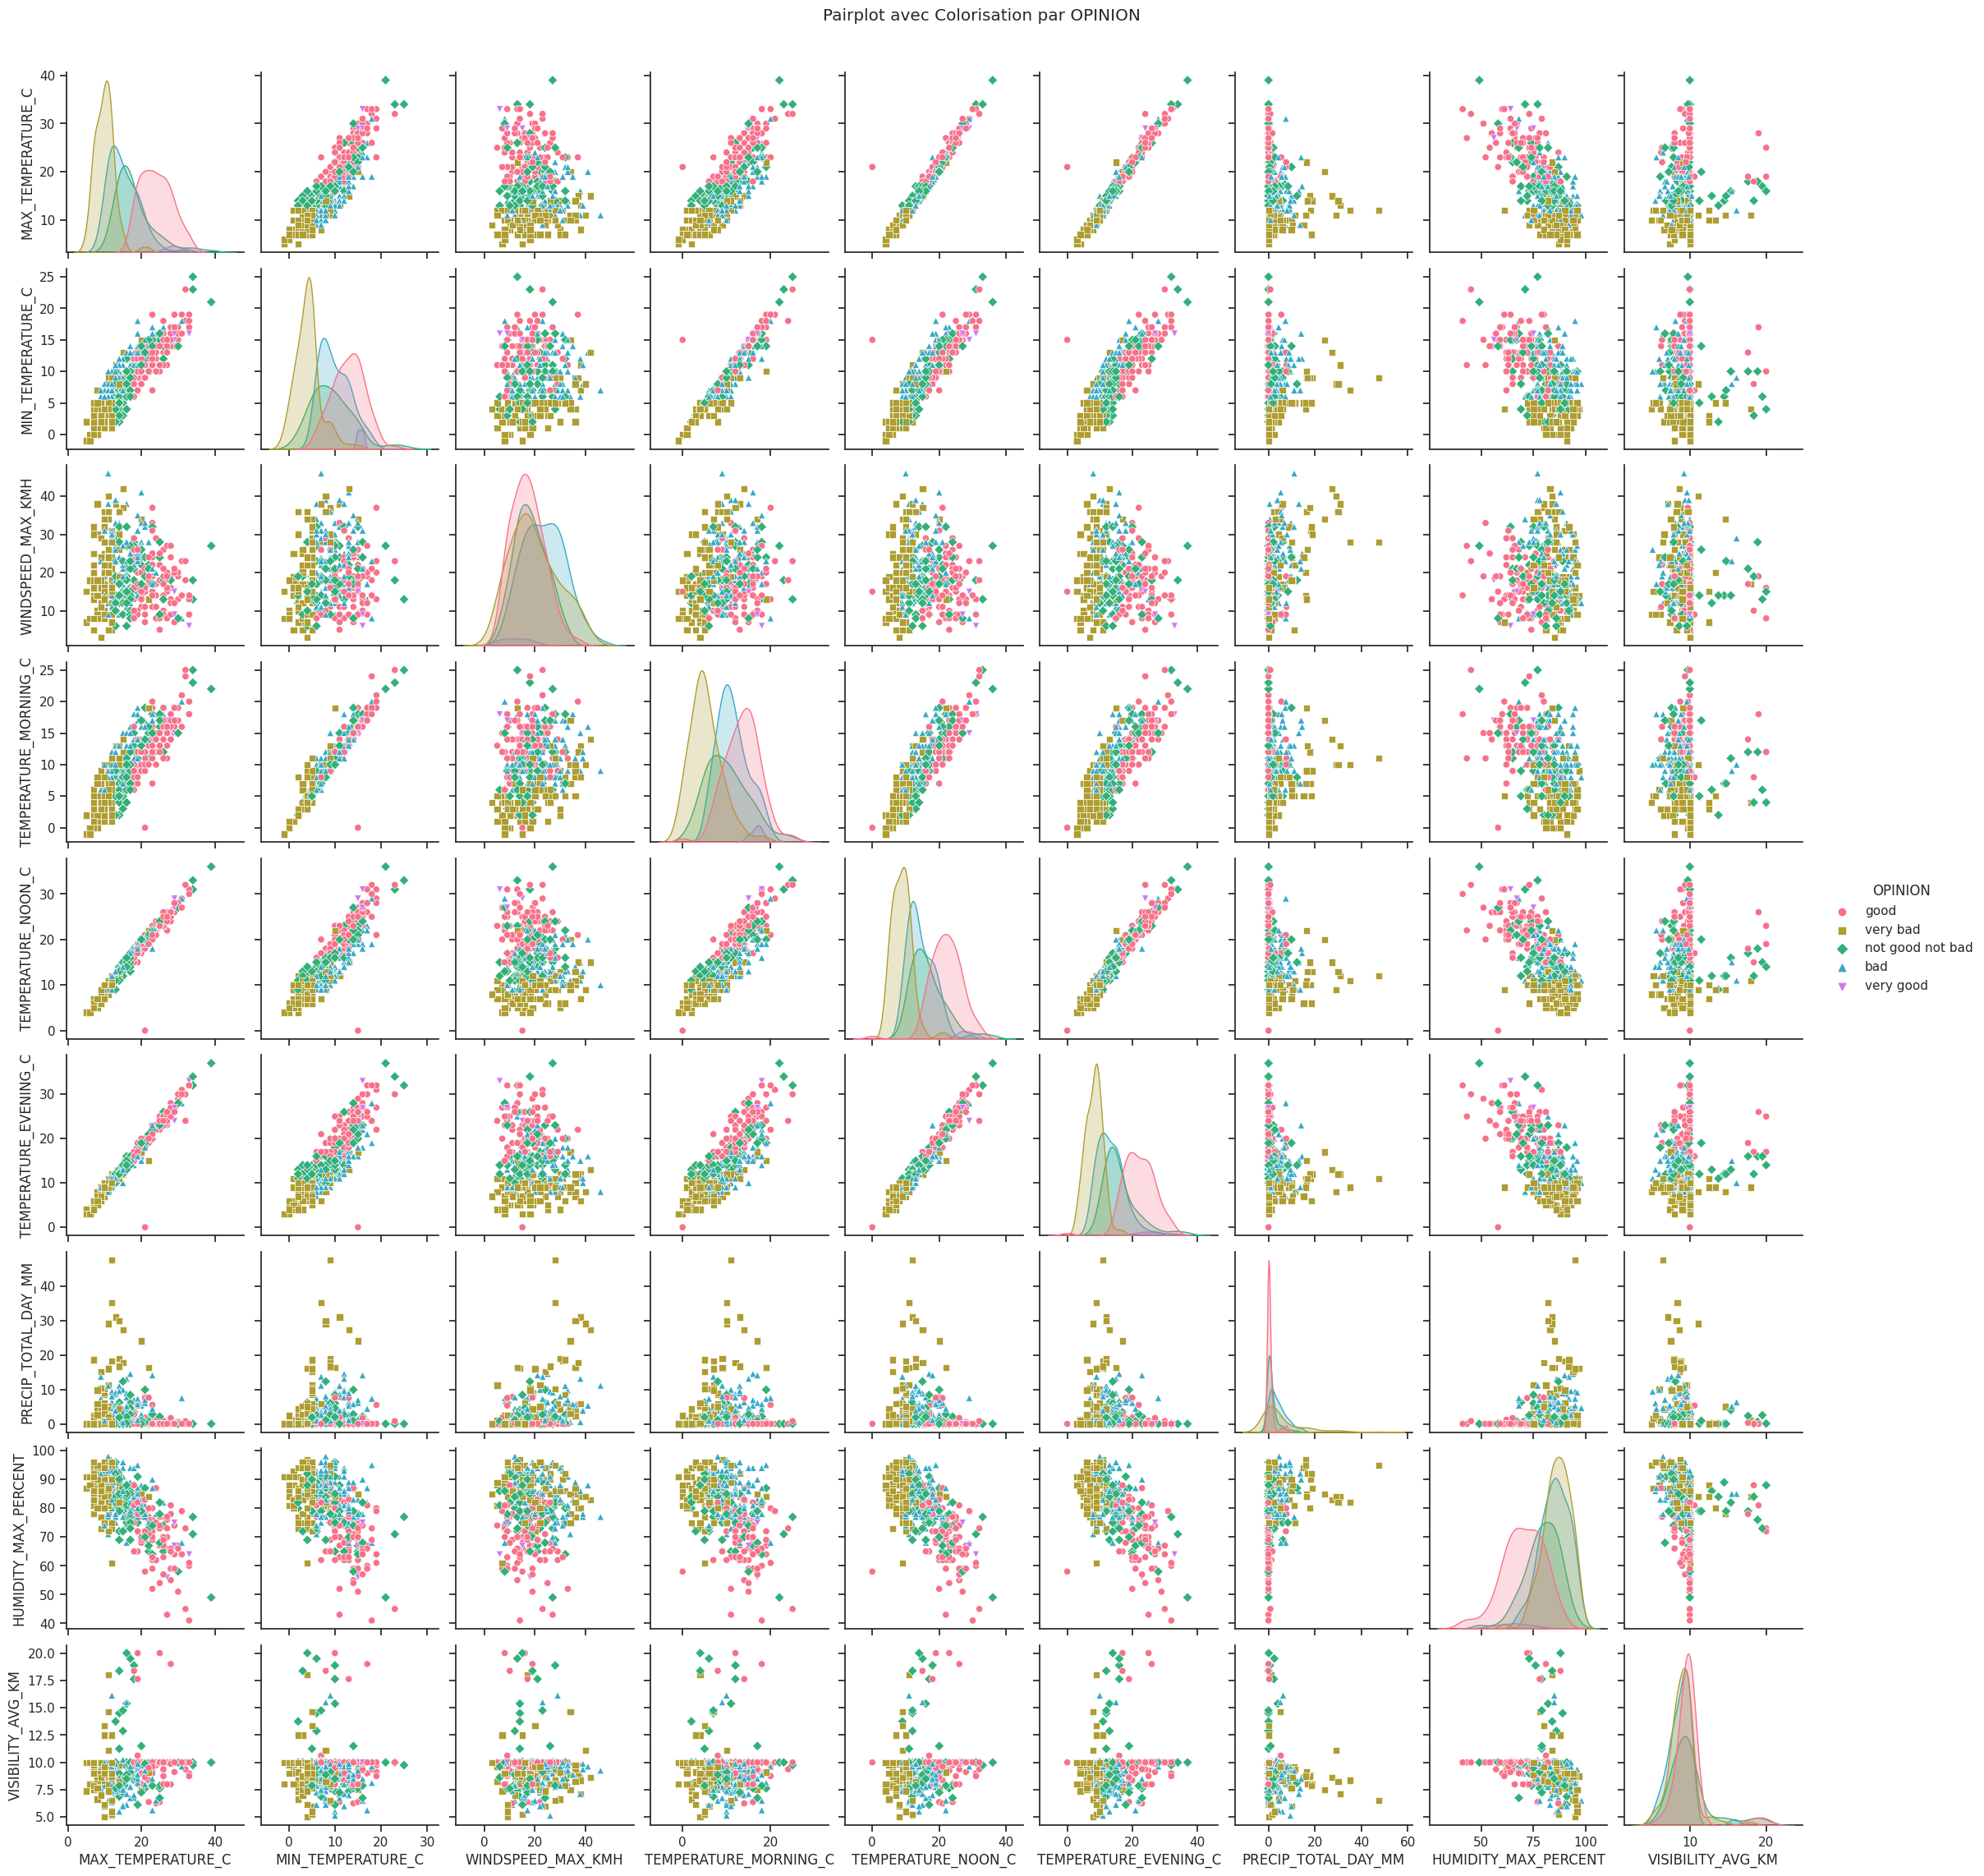

In [38]:
# It's your turn:
# Ajoutez des colonnes à inclure
colonnes_a_inclure = ['MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C', 'WINDSPEED_MAX_KMH', 'TEMPERATURE_MORNING_C',
                       'TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C', 'PRECIP_TOTAL_DAY_MM',
                       'HUMIDITY_MAX_PERCENT', 'VISIBILITY_AVG_KM', 'OPINION']

# Créez d'une tranche du DataFrame avec les colonnes sélectionnées
df_sous_ensemble = df_weather[colonnes_a_inclure]

# S'assurezque la taille de l'échantillon ne dépasse pas la taille de la population
taille_echantillon = min(500, len(df_sous_ensemble))

# Créez un échantillon du sous-ensemble
df_echantillon = df_sous_ensemble.sample(n=taille_echantillon, random_state=42)

#style du pairplot
sns.set(style="ticks", palette="muted")

#pairplot et colorez par "OPINION"
pairplot = sns.pairplot(df_echantillon, hue="OPINION", palette="husl", markers=["o", "s", "D", "^", "v"])


pairplot.fig.suptitle("Pairplot avec Colorisation par OPINION", y=1.02)


plt.show()

## Linear regression

With `regplot`, you can plot a regresion line. It's very simple, but here, it's not very adapted, because our 2 columns seems not correlated. But you know lots of correlated columns with MAX Temperature.
Replace the X-axis with a positively correlated columns, then plot another regplot with a negative correlation.

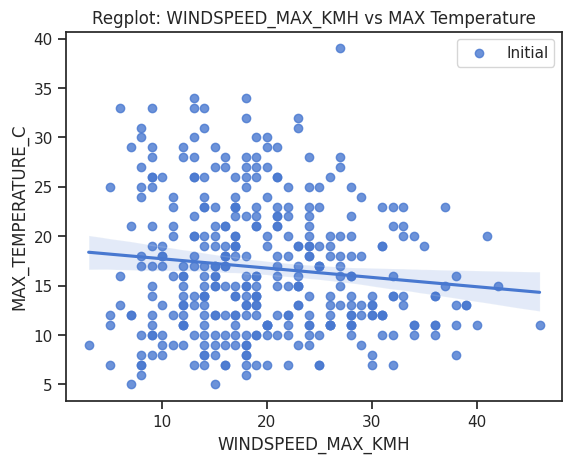

In [48]:
# Graphique de régression initial
sns.regplot(x='WINDSPEED_MAX_KMH', y='MAX_TEMPERATURE_C', data=df_weather, label='Initial')
plt.title('Regplot: WINDSPEED_MAX_KMH vs MAX Temperature')
plt.legend()
plt.show()

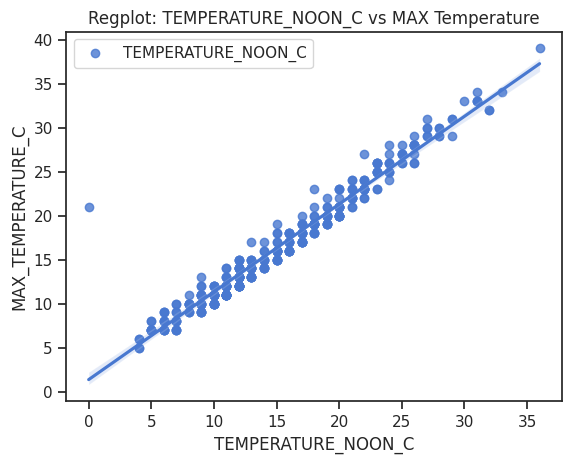

In [49]:
# Display a regplot with a positive correlation:
positive_correlation_column = 'TEMPERATURE_NOON_C'
sns.regplot(x=positive_correlation_column, y='MAX_TEMPERATURE_C', data=df_weather, label=positive_correlation_column)
plt.title(f'Regplot: {positive_correlation_column} vs MAX Temperature')
plt.legend()
plt.show()

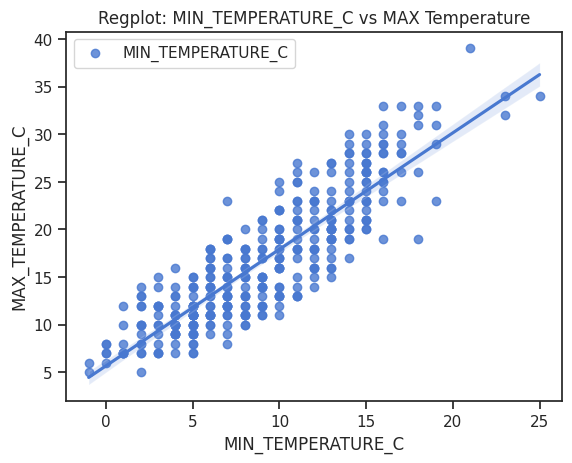

In [50]:
# Display a regplot with a negative correlation:
# Colonnes corrélées négativement
negative_correlation_column = 'MIN_TEMPERATURE_C'
sns.regplot(x=negative_correlation_column, y='MAX_TEMPERATURE_C', data=df_weather, label=negative_correlation_column)
plt.title(f'Regplot: {negative_correlation_column} vs MAX Temperature')
plt.legend()
plt.show()

# More and more...
Draw 4 different charts of your choice on the same dashboard. You're an analyst, you have to be force of proposal. Your goal here is to represent which season has the best weather.

Remember, a MatPlotLib "figure" is like a dashboard including subplots. So you have to create a MatPlotLib figure with subplots. And these subplots will be Seaborn's charts.

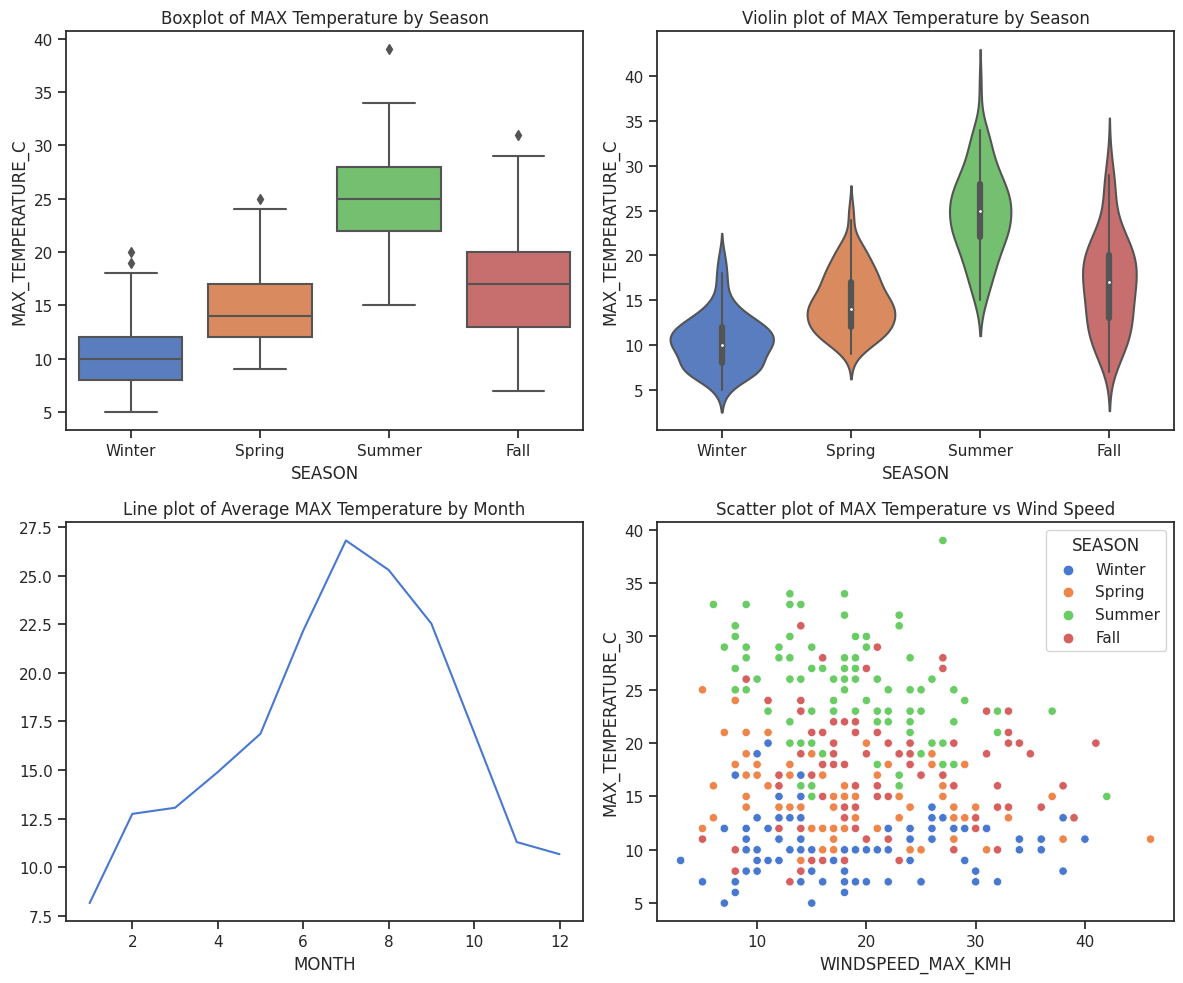

In [51]:

# Convert the 'DATE' column to datetime format
df_weather['DATE'] = pd.to_datetime(df_weather['DATE'])

# Extract the month to create a 'MONTH' column
df_weather['MONTH'] = df_weather['DATE'].dt.month

# Create a new column for the season based on the month
df_weather['SEASON'] = df_weather['MONTH'].apply(lambda month: (
    'Winter' if month in [12, 1, 2] else
    'Spring' if month in [3, 4, 5] else
    'Summer' if month in [6, 7, 8] else
    'Fall'   if month in [9, 10, 11] else 'Unknown'
))

# Create a Matplotlib figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Chart 1: Boxplot of MAX Temperature by Season
sns.boxplot(x='SEASON', y='MAX_TEMPERATURE_C', data=df_weather, ax=axes[0, 0])
axes[0, 0].set_title('Boxplot of MAX Temperature by Season')

# Chart 2: Violin plot of MAX Temperature by Season
sns.violinplot(x='SEASON', y='MAX_TEMPERATURE_C', data=df_weather, ax=axes[0, 1])
axes[0, 1].set_title('Violin plot of MAX Temperature by Season')

# Chart 3: Line plot of Average MAX Temperature by Month
average_max_temp_by_month = df_weather.groupby('MONTH')['MAX_TEMPERATURE_C'].mean()
sns.lineplot(x=average_max_temp_by_month.index, y=average_max_temp_by_month.values, ax=axes[1, 0])
axes[1, 0].set_title('Line plot of Average MAX Temperature by Month')

# Chart 4: Scatter plot of MAX Temperature vs Wind Speed
sns.scatterplot(x='WINDSPEED_MAX_KMH', y='MAX_TEMPERATURE_C', data=df_weather, hue='SEASON', ax=axes[1, 1])
axes[1, 1].set_title('Scatter plot of MAX Temperature vs Wind Speed')

# Adjust layout
plt.tight_layout()
plt.show()


# Is it summer? It seems appropriate. :)